In [2]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [3]:
# Подготовка данных
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Лабы нейронки/data.xlsx")

df = df[["ХСН", "САД", "КСР", "QRS", "HCT", "PLT", "СКФ"]]
df = df.dropna()
df = df.to_numpy()

X = df[:, 1:]
y = df[:, 0]


# Выбор двух признаков для классификации (САД и КСР)
X_selected = X[:, [0, 1]]

# Разделение выборки на тестовую и обучающую
X_train, X_test, y_train, y_test =  train_test_split(X_selected, y, test_size=0.32, random_state=42)


print(X_selected[0])

[170.  32.]


Время обучения модели: 0.1491 секунд
ROC AUC: 0.9637389202256246


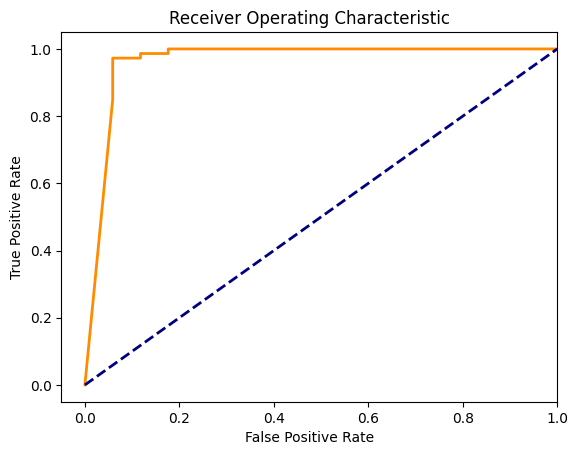

In [4]:
# Обучение модели случайного леса
start_time = time.time()
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Построение ROC-кривой и расчёт ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Вывод времени обучения
print(f'Время обучения модели: {training_time:.4f} секунд')

# Вывод ROC AUC
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC: area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

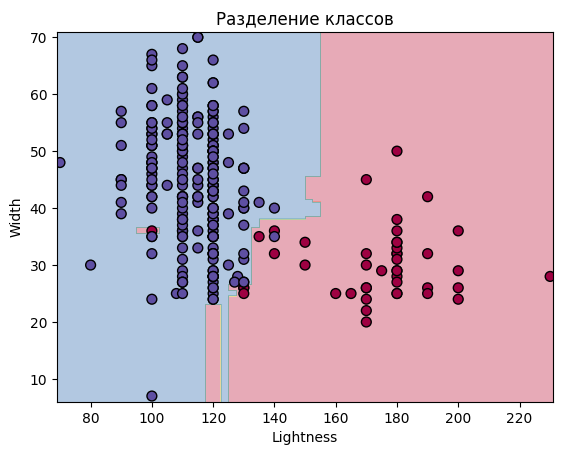

In [6]:
x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
plt.scatter(X_selected[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.Spectral)
plt.xlabel('Lightness')
plt.ylabel('Width')
plt.title('Разделение классов')
plt.show()

Оптимальное число деревьев: 10


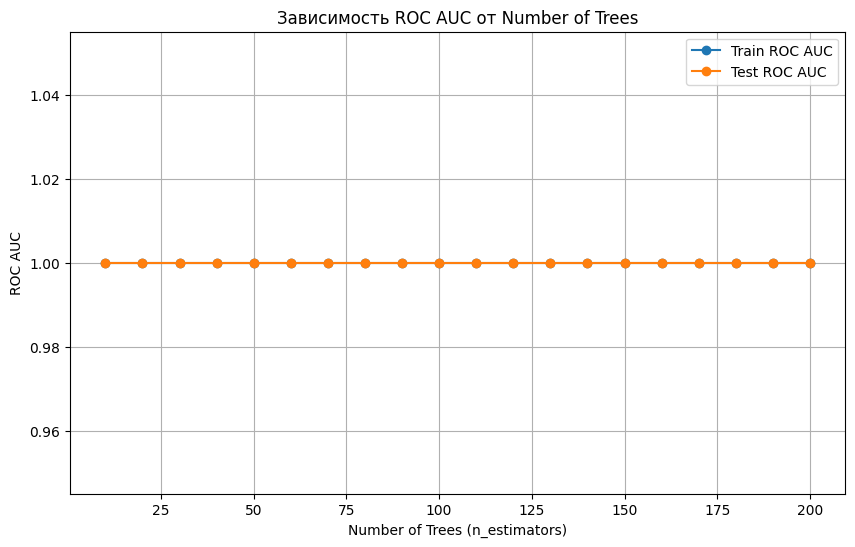

In [ ]:
# Подбор оптимального числа деревьев
n_estimators_range = range(10, 201, 10)  # Диапазон числа деревьев
train_auc_scores = []
test_auc_scores = []

for n_estimators in n_estimators_range:
    # число деревьев по-умолчанию 100
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)

    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)

# Определение оптимального числа деревьев
optimal_n_estimators = n_estimators_range[np.argmax(test_auc_scores)]
print(f'Оптимальное число деревьев: {optimal_n_estimators}')

# Построение графика зависимости ROC AUC от числа деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_auc_scores, label='Train ROC AUC', marker='o')
plt.plot(n_estimators_range, test_auc_scores, label='Test ROC AUC', marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('ROC AUC')
plt.title('Зависимость ROC AUC от Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

Оптимальная максимальная глубина деревьев: 1


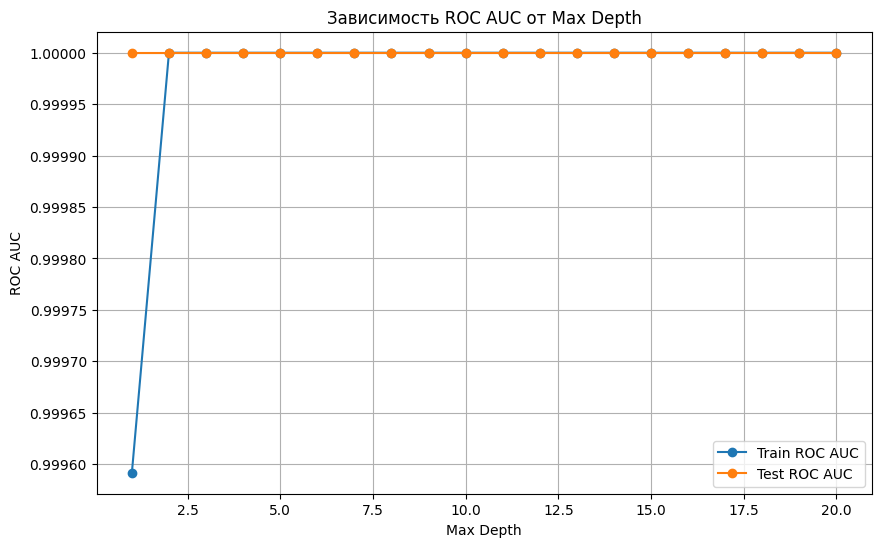

In [ ]:
# Подбор оптимальной максимальной глубины деревьев
max_depth_range = range(1, 21)
train_auc_scores = []
test_auc_scores = []

for max_depth in max_depth_range:
    # по умолчанию None - не ограничена
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred_proba = model.predict_proba(X_train)[:, 1]
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred_proba)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)

    train_auc_scores.append(train_auc)
    test_auc_scores.append(test_auc)

optimal_max_depth = max_depth_range[np.argmax(test_auc_scores)]
print(f'Оптимальная максимальная глубина деревьев: {optimal_max_depth}')

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_auc_scores, label='Train ROC AUC', marker='o')
plt.plot(max_depth_range, test_auc_scores, label='Test ROC AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('ROC AUC')
plt.title('Зависимость ROC AUC от Max Depth')
plt.legend()
plt.grid(True)
plt.show()

Время обучения модели: 0.0288 секунд
ROC AUC: 1.0


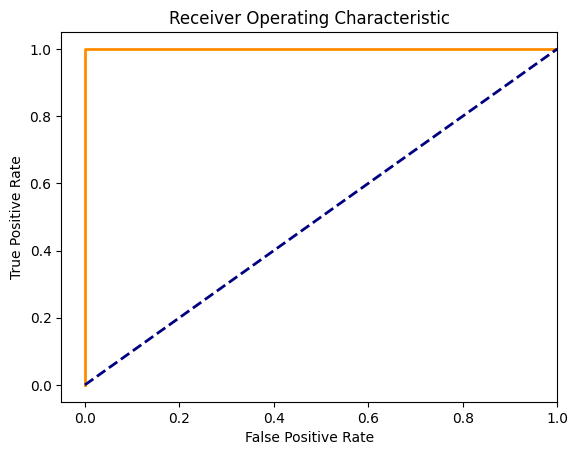

In [ ]:
# Обучение модели случайного леса c оптимальными параметрами
start_time = time.time()
model = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=42)
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Построение ROC-кривой и расчёт ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Вывод времени обучения
print(f'Время обучения модели: {training_time:.4f} секунд')

# Вывод ROC AUC
print(f'ROC AUC: {roc_auc}')

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC: area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
patient_params = list(map(float, input().split()))
predicted_class = model.predict([patient_params])
print(f"Предположительный класс XCH: {predicted_class[0]}")

150. 40. 90 15 250 40
Предположительный класс XCH: 1.0
